##  911 Calls Exploratory Data Analysis --- Montgomery County

##### 2017/12/10

#####  About 911:

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce.
For more information : http://www.911.gov/about_national_911program.html



#####  About Montgomery County:


Montgomery County, locally also referred to as Montco, is a county located in the Commonwealth of Pennsylvania. As of the 2010 census, the population was 799,874, making it the third-most populous county in Pennsylvania, after Philadelphia and Allegheny Counties. The county seat is Norristown. Montgomery County is very diverse, ranging from farms and open land in Upper Hanover to densely populated rowhouse streets in Cheltenham.

    
##### Questions?

What are the types of 911 calls ?
How many calls based on type?


###  Sneak peak into the dataset

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

# Read data 
d=pd.read_csv("911.csv",
    header=0,names=['lat', 'lng','desc','zip','title','timeStamp','twp','addr','e'],
    dtype={'lat':str,'lng':str,'desc':str,'zip':str,
                  'title':str,'timeStamp':str,'twp':str,'addr':str,'e':int}, 
     parse_dates=['timeStamp'],date_parser=dateparse)


# Set index
d.index = pd.DatetimeIndex(d.timeStamp)
d=d[(d.timeStamp >= "2016-01-01 00:00:00")]

In [2]:
d.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
timeStamp,,,,,,,,,
2016-01-01 00:10:08,40.1213543,-75.3638292,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1
2016-01-01 00:14:45,40.1405049,-75.3108737,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1
2016-01-01 00:20:43,40.2468373,-75.6813814,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1
2016-01-01 00:25:30,40.0972222,-75.3761952,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1
2016-01-01 00:30:28,40.1484317,-75.2198118,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1


In [3]:
# Title is the category of the call
d["title"].value_counts()

Traffic: VEHICLE ACCIDENT -             60067
Traffic: DISABLED VEHICLE -             18429
Fire: FIRE ALARM                        14656
EMS: RESPIRATORY EMERGENCY              13074
EMS: FALL VICTIM                        13020
EMS: CARDIAC EMERGENCY                  12997
EMS: VEHICLE ACCIDENT                   10496
Traffic: ROAD OBSTRUCTION -              8017
EMS: SUBJECT IN PAIN                     7320
EMS: HEAD INJURY                         6857
EMS: UNKNOWN MEDICAL EMERGENCY           4648
EMS: SYNCOPAL EPISODE                    4441
Fire: VEHICLE ACCIDENT                   4403
EMS: SEIZURES                            4287
EMS: GENERAL WEAKNESS                    4085
EMS: ALTERED MENTAL STATUS               3781
EMS: ABDOMINAL PAINS                     3718
EMS: MEDICAL ALERT ALARM                 3636
Fire: FIRE INVESTIGATION                 3584
EMS: OVERDOSE                            3325
EMS: UNCONSCIOUS SUBJECT                 3297
EMS: HEMORRHAGING                 

### Working with the Data 

What are the types of 911 calls ?
How many calls based on type?

In [4]:
# There are 3 groups -- EMS, Fire, Traffic
# We'll call these type.  This type is split on ':'
d['type'] = d["title"].apply(lambda x: x.split(':')[0])

In [5]:
d["type"].value_counts()

EMS        129336
Traffic     90477
Fire        38814
Name: type, dtype: int64

### Pivot Table

Explore data with just Fire

In [6]:
# Let's create a pivot table with just Fire
# It will be stored in a variable 'pp'
g=d[d['type'] == 'Fire' ]
p=pd.pivot_table(g, values='e', index=['timeStamp'], columns=['title'], aggfunc=np.sum)

# Resampling every week 'W'.  This is very powerful
pp=p.resample('W', how=[np.sum]).reset_index()
pp.head()

,timeStamp,Fire: ANIMAL COMPLAINT,Fire: APPLIANCE FIRE,Fire: BUILDING FIRE,Fire: BURN VICTIM,Fire: CARBON MONOXIDE DETECTOR,Fire: CARDIAC ARREST,Fire: CARDIAC EMERGENCY,Fire: DEBRIS/FLUIDS ON HIGHWAY,Fire: DIABETIC EMERGENCY,...,Fire: TRANSFERRED CALL,Fire: TRASH/DUMPSTER FIRE,Fire: UNCONSCIOUS SUBJECT,Fire: UNKNOWN MEDICAL EMERGENCY,Fire: UNKNOWN TYPE FIRE,Fire: UNRESPONSIVE SUBJECT,Fire: VEHICLE ACCIDENT,Fire: VEHICLE FIRE,Fire: VEHICLE LEAKING FUEL,Fire: WOODS/FIELD FIRE
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,2016-01-03,NaN,3.0,6.0,NaN,8.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,3.0,NaN,7.0,4.0,NaN,3.0
1,2016-01-10,NaN,7.0,32.0,NaN,28.0,NaN,NaN,2.0,NaN,...,1.0,7.0,NaN,NaN,13.0,NaN,53.0,15.0,1.0,2.0
2,2016-01-17,NaN,6.0,24.0,NaN,20.0,NaN,NaN,1.0,NaN,...,1.0,4.0,NaN,NaN,5.0,NaN,58.0,13.0,2.0,4.0
3,2016-01-24,NaN,8.0,26.0,NaN,26.0,NaN,NaN,2.0,NaN,...,NaN,5.0,NaN,NaN,8.0,NaN,38.0,10.0,1.0,5.0
4,2016-01-31,NaN,8.0,12.0,1.0,25.0,NaN,NaN,2.0,NaN,...,2.0,2.0,NaN,NaN,2.0,NaN,32.0,6.0,1.0,1.0


In [7]:
# Let's flatten the columns 
pp.columns = pp.columns.get_level_values(0)

pp.head()

,timeStamp,Fire: ANIMAL COMPLAINT,Fire: APPLIANCE FIRE,Fire: BUILDING FIRE,Fire: BURN VICTIM,Fire: CARBON MONOXIDE DETECTOR,Fire: CARDIAC ARREST,Fire: CARDIAC EMERGENCY,Fire: DEBRIS/FLUIDS ON HIGHWAY,Fire: DIABETIC EMERGENCY,...,Fire: TRANSFERRED CALL,Fire: TRASH/DUMPSTER FIRE,Fire: UNCONSCIOUS SUBJECT,Fire: UNKNOWN MEDICAL EMERGENCY,Fire: UNKNOWN TYPE FIRE,Fire: UNRESPONSIVE SUBJECT,Fire: VEHICLE ACCIDENT,Fire: VEHICLE FIRE,Fire: VEHICLE LEAKING FUEL,Fire: WOODS/FIELD FIRE
0,2016-01-03,NaN,3.0,6.0,NaN,8.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,3.0,NaN,7.0,4.0,NaN,3.0
1,2016-01-10,NaN,7.0,32.0,NaN,28.0,NaN,NaN,2.0,NaN,...,1.0,7.0,NaN,NaN,13.0,NaN,53.0,15.0,1.0,2.0
2,2016-01-17,NaN,6.0,24.0,NaN,20.0,NaN,NaN,1.0,NaN,...,1.0,4.0,NaN,NaN,5.0,NaN,58.0,13.0,2.0,4.0
3,2016-01-24,NaN,8.0,26.0,NaN,26.0,NaN,NaN,2.0,NaN,...,NaN,5.0,NaN,NaN,8.0,NaN,38.0,10.0,1.0,5.0
4,2016-01-31,NaN,8.0,12.0,1.0,25.0,NaN,NaN,2.0,NaN,...,2.0,2.0,NaN,NaN,2.0,NaN,32.0,6.0,1.0,1.0


### Graphs/plots

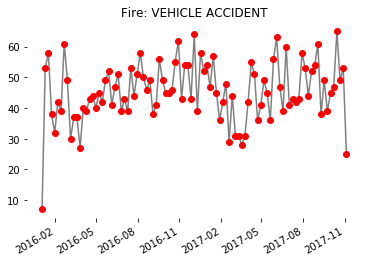

In [8]:
# Red dot with Line
fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  



ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=10) 



ax.plot_date(pp['timeStamp'], pp['Fire: VEHICLE ACCIDENT'],'k', color='grey')
ax.plot_date(pp['timeStamp'], pp['Fire: VEHICLE ACCIDENT'],'ro', color='red')


ax.set_title("Fire: VEHICLE ACCIDENT")
fig.autofmt_xdate()
plt.show()

In [9]:
# Remove the first and last row
pp = pp[pp['timeStamp'] < pp['timeStamp'].max()]
pp = pp[pp['timeStamp'] > pp['timeStamp'].min()]

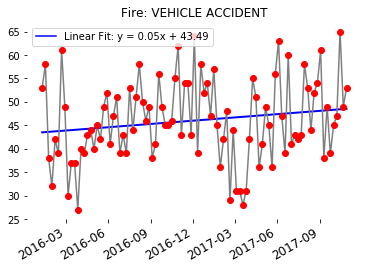

In [10]:
# Get the best fitting line

# Need to import for legend
import matplotlib.lines as mlines

# For best fit line
from sklearn import linear_model

# Red dot with Line
fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  



ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 



# Build Linear Fit
Y = pp['Fire: VEHICLE ACCIDENT'].values.reshape(-1,1)
X=np.arange(Y.shape[0]).reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(X,Y)
m = model.coef_[0][0]
c = model.intercept_[0]
ax.plot(pp['timeStamp'],model.predict(X), color='blue',
         linewidth=2)
blue_line = mlines.Line2D([], [], color='blue', label='Linear Fit: y = %2.2fx + %2.2f' % (m,c))
ax.legend(handles=[blue_line], loc='best')


ax.plot_date(pp['timeStamp'], pp['Fire: VEHICLE ACCIDENT'],'k', color='grey')
ax.plot_date(pp['timeStamp'], pp['Fire: VEHICLE ACCIDENT'],'ro',  color='red')


ax.set_title("Fire: VEHICLE ACCIDENT")
fig.autofmt_xdate()
plt.show()

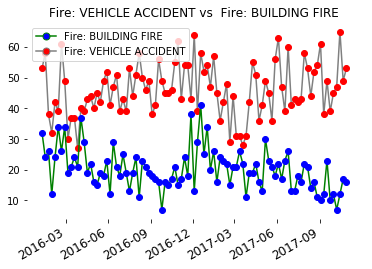

In [11]:
# Need to import for legend
import matplotlib.lines as mlines

fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  


ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 


ax.plot_date(pp['timeStamp'], pp['Fire: VEHICLE ACCIDENT'],'k',color='grey')
ax.plot_date(pp['timeStamp'], pp['Fire: VEHICLE ACCIDENT'],'ro')


ax.plot_date(pp['timeStamp'], pp['Fire: BUILDING FIRE'],'g')
ax.plot_date(pp['timeStamp'], pp['Fire: BUILDING FIRE'],'bo')


ax.set_title("Fire: VEHICLE ACCIDENT vs  Fire: BUILDING FIRE")


# Legend Stuff
green_line = mlines.Line2D([], [], color='green', marker='o',markerfacecolor='blue',
                          markersize=7, label='Fire: BUILDING FIRE')
black_line = mlines.Line2D([], [], color='grey', marker='o',markerfacecolor='red',
                          markersize=7, label='Fire: VEHICLE ACCIDENT')

ax.legend(handles=[green_line,black_line], loc='best')


fig.autofmt_xdate()
plt.show()

# Note scale hides the assault increase 

####  'VEHICLE ACCIDENT' has the similar trend with ' BUILDING FIRE' in 2016-01 --- 2016-04 , 2016-012--- 2017-03, but different trend in 2016-04 --- 2016-12, 2016-03 --- 2016-11


### Graphs/plots

In [12]:
# Vehicle Accident -- yes, there is FIRE; maybe we should have include?
# Put this in a variable 'g'
g = d[(d.title.str.match(r'Fire: VEHICLE ACCIDENT') | d.title.str.match(r'Traffic:.*VEHICLE ACCIDENT.*'))]
g['Month'] = g['timeStamp'].apply(lambda x: x.strftime('%m %B'))
g['Hour'] = g['timeStamp'].apply(lambda x: x.strftime('%H'))
p=pd.pivot_table(g, values='e', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p.head()

Hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
01 January,84,48,52,44,37,65,227,332,406,270,...,356,386,406,510,424,277,222,194,117,98
02 February,54,48,39,25,20,81,176,321,303,275,...,330,409,412,392,393,247,149,120,83,86
03 March,46,52,56,33,28,49,153,322,308,296,...,376,478,503,420,323,217,168,127,93,75
04 April,62,40,47,32,45,59,124,264,310,264,...,402,496,502,488,349,184,186,115,95,72
05 May,79,60,53,25,28,55,135,335,386,323,...,430,496,568,572,363,211,189,168,155,97


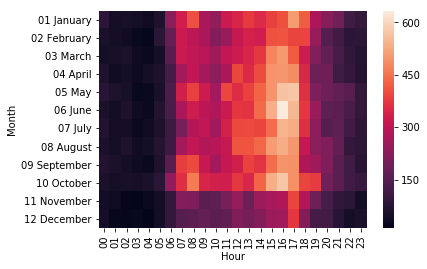

In [13]:
%matplotlib inline
sns.heatmap(p)

##### there are more 911 calls for 'Fire: VEHICLE ACCIDENT' during15, 00 --- 17,00, maybe because of rush hour.
##### And the most worse one in June.